In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

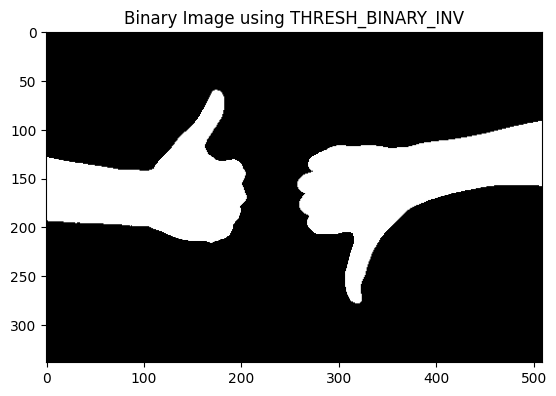

Number of Contours found: 2


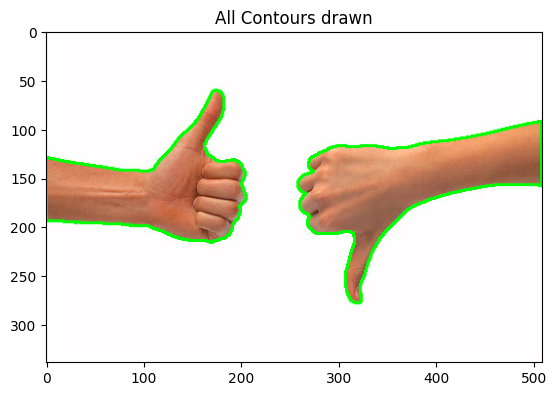

In [15]:
imBGR = cv2.imread('images/thumbs_up_down.jpg')
imGray = cv2.cvtColor(imBGR,cv2.COLOR_BGR2GRAY)
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB)

#Create a  Binary Image

_,binary = cv2.threshold(imGray,220,255,cv2.THRESH_BINARY_INV)
plt.imshow(binary,'gray',vmin=0,vmax=255)
plt.title('Binary Image using THRESH_BINARY_INV')
plt.show()


#https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html
#find Contours
contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(f'Number of Contours found: {len(contours)}')

#Draw Contours

output = cv2.drawContours(imRGB, contours, -1, (0,255,0), 2)
plt.imshow(output)
plt.title('All Contours drawn')
plt.show()




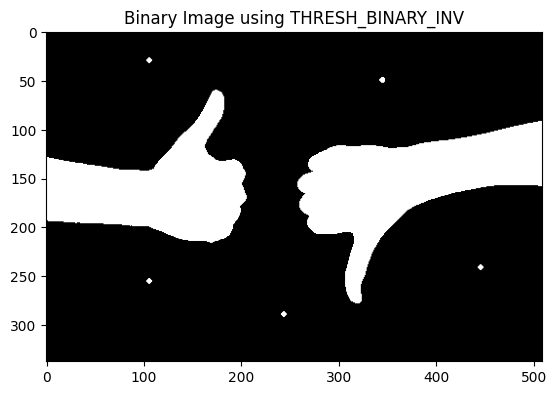

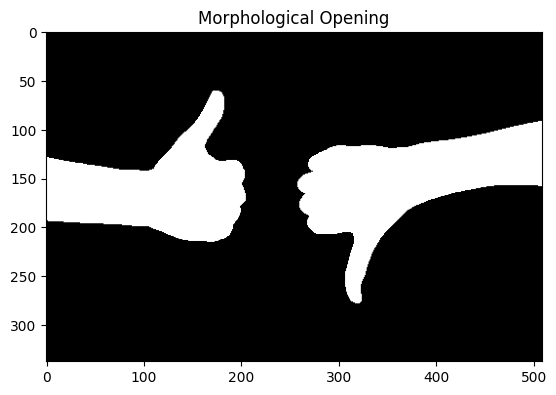

Number of Contours found: 2


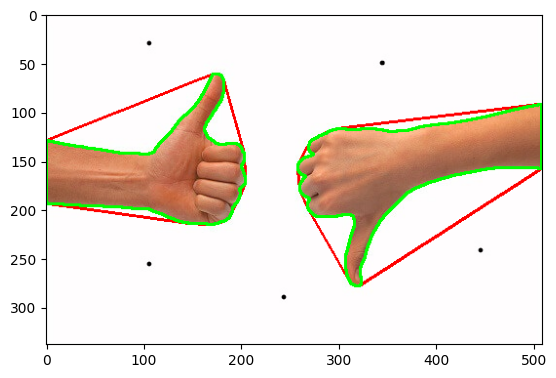

In [5]:
#Sample Pipeline for Contour Detection
# Loading >>> GRAY >>> BINARY IMAGE THRESHOLDING >>> MORPHOLOGY >>> CONTOUR DETECTION >>> CONTOUR OPERATIONS

imBGR = cv2.imread('images/noise_out_thumbs_up_down.jpg')
imGray = cv2.cvtColor(imBGR,cv2.COLOR_BGR2GRAY)
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB)

#Create a  Binary Image

_,binary = cv2.threshold(imGray,220,255,cv2.THRESH_BINARY_INV)
plt.imshow(binary,'gray',vmin=0,vmax=255)
plt.title('Binary Image using THRESH_BINARY_INV')
plt.show()

#Morphological opening to remove artefactes outside of the hands
SEKernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(binary,cv2.MORPH_OPEN,SEKernel)
plt.imshow(opening,'gray',vmin=0,vmax=255)
plt.title('Morphological Opening')
plt.show()

#Find Contours

contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(f'Number of Contours found: {len(contours)}')

#Draw Contours

for c in contours:
    hull = cv2.convexHull(c)
    output = cv2.drawContours(imRGB, [hull], 0, (255,0,0), 2)
    output = cv2.drawContours(imRGB, [c], 0, (0,255,0), 2)


# output = cv2.drawContours(imRGB, contours, -1, (0,255,0), 2)
plt.imshow(imRGB)
plt.show()




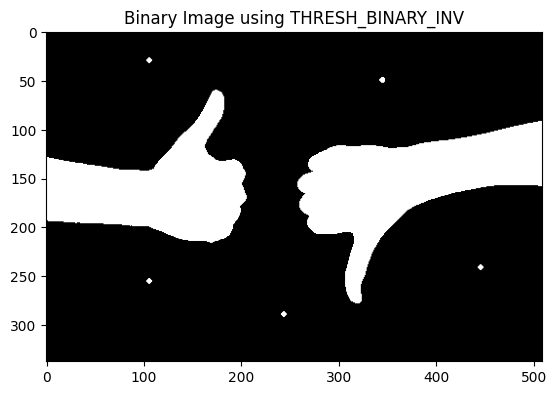

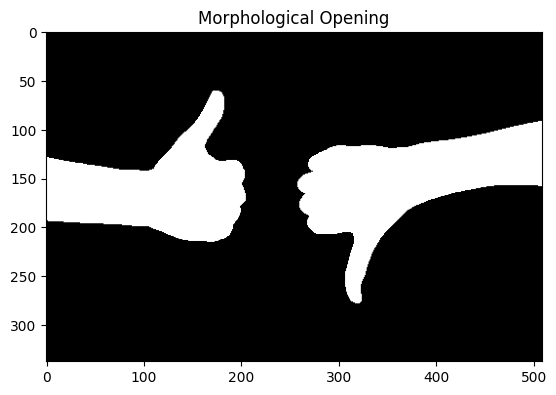

Number of Contours found: 2
{'m00': 18114.0, 'm10': 6724335.666666666, 'm01': 2818371.1666666665, 'm20': 2583661931.6666665, 'm11': 1023095246.25, 'm02': 459807238.8333333, 'm30': 1026469073659.7001, 'm21': 384011013184.4167, 'm12': 163204890706.31665, 'm03': 78898358068.25, 'mu20': 87433039.20749474, 'mu11': -23149302.602909803, 'mu02': 21294705.262723446, 'mu30': 2439688339.444824, 'mu21': -795817461.5601692, 'mu12': -282553365.0941868, 'mu03': 730077689.3867188, 'nu20': 0.26646909569870236, 'nu11': -0.07055197653616761, 'nu02': 0.06489973248055535, 'nu30': 0.05524569506588276, 'nu21': -0.01802094476520832, 'nu12': -0.006398299649776031, 'nu03': 0.016532295847034816}
{'m00': 15324.5, 'm10': 1722871.0, 'm01': 2467034.1666666665, 'm20': 243796235.91666666, 'm11': 273392457.4583333, 'm02': 410365673.4166666, 'm30': 37534290881.4, 'm21': 38337463989.166664, 'm12': 45258656329.96667, 'm03': 69989019512.25, 'mu20': 50100879.94152883, 'mu11': -3966126.62331146, 'mu02': 13207033.36311233, 'm

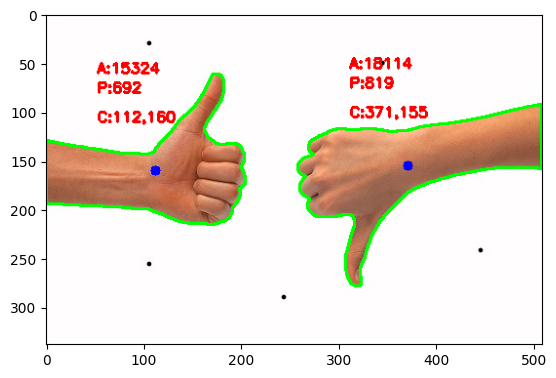

In [18]:
#contour moments , centroid, area and permimeter



imBGR = cv2.imread('images/noise_out_thumbs_up_down.jpg')
imGray = cv2.cvtColor(imBGR,cv2.COLOR_BGR2GRAY)
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB)

#Create a  Binary Image

_,binary = cv2.threshold(imGray,220,255,cv2.THRESH_BINARY_INV)
plt.imshow(binary,'gray',vmin=0,vmax=255)
plt.title('Binary Image using THRESH_BINARY_INV')
plt.show()

#Morphological opening to remove artefactes outside of the hands
SEKernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(binary,cv2.MORPH_OPEN,SEKernel)
plt.imshow(opening,'gray',vmin=0,vmax=255)
plt.title('Morphological Opening')
plt.show()

#Find Contours

contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(f'Number of Contours found: {len(contours)}')


for c in contours:
   M=cv2.moments(c)
   print(M)
   cX = int(M["m10"] / M["m00"]) #centroid x
   cY = int(M["m01"] / M["m00"]) #centroid y
   cv2.circle(imRGB, (cX, cY), 5, (0, 0, 255), -1)
   area = cv2.contourArea(c)
   perimeter = cv2.arcLength(c,True)
   cv2.putText(imRGB, f"A:{int(area)}", (cX - 60, cY - 100),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
   cv2.putText(imRGB, f"P:{int(perimeter)}", (cX - 60, cY - 80),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
   
   cv2.putText(imRGB, f"C:{cX},{cY}", (cX - 60, cY - 50),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
   cv2.drawContours(imRGB, [c], 0, (0,255,0), 2)


# output = cv2.drawContours(imRGB, contours, -1, (0,255,0), 2)
plt.imshow(imRGB)
plt.show()


